# Projeto #1 - Análise Exploratória de Dados

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela?

A base escolhida foi https://www.kaggle.com/paololol/league-of-legends-ranked-matches, pois eu habitualmente jogo o jogo sobre o qual fala a base, League of Legends, e gostaria de entender quais são as características do jogo que mais influenciam a taxa de vitória.

### 2) **(5%)** Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).
- Identificação da variável a serem trabalhadas
- Classificação das variáveis como: contínua ou discreta.


A variaveis a serem trabalhadas são:
win	Discreta
kills	Continua
deaths	Continua
assists	Continua
visionscore	Continua
goldearned	Continua
turretkills	Discreta
inhibkills	Discreta
firstblood	Discreta
farm	Continua
championname	Discreta
baronkills	Discreta
dragonkills	Discreta
harrykills	Discreta

### 2) **(15%)** Faça uma avaliação descritiva da sua base. Quantas linhas ela possui? Quais os tipos de dados? Quantas e quais features possuem?

Cada variável escolhida pelo aluno precisa passar por ao menos 1 pré-processamento. O pré-processamento pode ser (mas não está limitado a):
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [83]:
#import das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [84]:
#Leitura dos CSVs
df_champs_org = pd.read_csv('champs.csv')
df_matches_org = pd.read_csv('matches.csv')
df_participants_org = pd.read_csv('participants.csv')
df_stats1 = pd.read_csv('stats1.csv')
df_stats2 = pd.read_csv('stats2.csv')
df_stats_org = df_stats1.append(df_stats2, ignore_index=True, sort=False)
df_teamstats_org = pd.read_csv('teamstats.csv')

C:\Users\braga\Anaconda3\envs\pos-ds-ia-3.7\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [85]:
#tratamento do CSV champs
df_champs = df_champs_org.copy()
df_champs.rename(columns={'id':'championid'}, inplace=True)
df_champs.rename(columns={'name':'championname'}, inplace=True)

In [86]:
#tratamento do CSV matches
df_matches = df_matches_org.copy()
df_matches = df_matches[['id','duration']]
df_matches.rename(columns={'id':'gameid'}, inplace=True)

In [87]:
#tratamento do CSV participants
df_participants = df_participants_org.copy()
df_participants = df_participants.drop(['ss1','ss2'],axis=1)
df_participants.rename(columns={'matchid':'gameid'}, inplace=True)
condicao = [df_participants['player'] <= 5]
resultados = ['blue']
df_participants['team'] = np.select(condicao, resultados, 'red')
condicao = [df_participants['role'] == 'DUO_SUPPORT',
           df_participants['role'] == 'DUO_CARRY']
resultados = ['SUPPORT','CARRY']
df_participants['lane'] = np.select(condicao, resultados, df_participants['position'])
df_participants = df_participants.drop(['position','role'],axis=1)
df_participants = pd.merge(df_participants,df_champs,how='left', on=['championid'])
df_participants = df_participants.drop(['championid'],axis=1)
df_participants = pd.merge(df_participants,df_matches,how='left', on=['gameid'])

In [88]:
#tratamento do CSV stats
df_stats = df_stats_org.copy()
df_stats = df_stats[['id','win','kills','deaths','assists','totdmgtochamp','totheal','dmgtoobj','visionscore','totdmgtaken','goldearned','turretkills','inhibkills','totminionskilled','neutralminionskilled','totcctimedealt','firstblood']]
df_stats['farm'] = df_stats['totminionskilled'] + df_stats['neutralminionskilled']
df_stats = df_stats.drop(['totminionskilled','neutralminionskilled'],axis=1)

In [89]:
#tratamento do CSV teamstats
df_teamstats = df_teamstats_org.copy()
condicao = [df_teamstats['teamid'] == 100]
resultados = ['blue']
df_teamstats['team'] = np.select(condicao, resultados, 'red')
df_teamstats = df_teamstats.drop(['firstblood', 'inhibkills','teamid'],axis=1)
df_teamstats.rename(columns={'matchid':'gameid'}, inplace=True)

In [90]:
#Junção dos CSVs no DF (base de dados)
df_v1 = df_stats.copy()
df_v1 = pd.merge(df_v1,df_participants,how='left', on=['id'])
df_v2 = df_v1.copy()
df_v2 = pd.merge(df_v2,df_teamstats,how='left', on=['gameid','team'])
df_v2 = df_v2.drop(['id','gameid','player','team','towerkills'],axis=1)
df = df_v2.copy()

In [91]:
df = df[df['duration'] >= 900]
df = df.drop(['totdmgtochamp','totheal','dmgtoobj','totdmgtaken','totcctimedealt','lane','duration','firsttower','firstinhib','firstbaron','firstdragon','firstharry'],axis=1)

In [92]:
#Tipos de dados
df.dtypes

win              int64
kills            int64
deaths           int64
assists          int64
visionscore      int64
goldearned       int64
turretkills      int64
inhibkills       int64
firstblood       int64
farm             int64
championname    object
baronkills       int64
dragonkills      int64
harrykills       int64
dtype: object

In [93]:
df.describe()

,win,kills,deaths,assists,visionscore,goldearned,turretkills,inhibkills,firstblood,farm,baronkills,dragonkills,harrykills
count,1778703.0,1.778703e+06,1.778703e+06,1.778703e+06,1.778703e+06,1.778703e+06,1.778703e+06,1.778703e+06,1.778703e+06,1.778703e+06,1.778703e+06,1.778703e+06,1.778703e+06
mean,0.5,5.960496e+00,5.984102e+00,8.569655e+00,1.425631e+01,1.173072e+04,9.406281e-01,1.860541e-01,1.003366e-01,1.449135e+02,4.278916e-01,1.486278e+00,2.351039e-01
std,0.5,4.567585e+00,3.161377e+00,5.837440e+00,1.750048e+01,3.640578e+03,1.219428e+00,4.678034e-01,3.004484e-01,8.036615e+01,6.133558e-01,1.230738e+00,4.250438e-01
min,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.064000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,2.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,9.116000e+03,0.000000e+00,0.000000e+00,0.000000e+00,8.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,5.000000e+00,6.000000e+00,7.000000e+00,1.000000e+01,1.149300e+04,1.000000e+00,0.000000e+00,0.000000e+00,1.480000e+02,0.000000e+00,1.000000e+00,0.000000e+00
75%,1.0,9.000000e+00,8.000000e+00,1.200000e+01,2.200000e+01,1.403300e+04,2.000000e+00,0.000000e+00,0.000000e+00,1.990000e+02,1.000000e+00,2.000000e+00,0.000000e+00
max,1.0,4.500000e+01,3.800000e+01,5.700000e+01,1.790000e+02,4.098200e+04,1.000000e+01,7.000000e+00,1.000000e+00,7.610000e+02,5.000000e+00,7.000000e+00,2.000000e+00


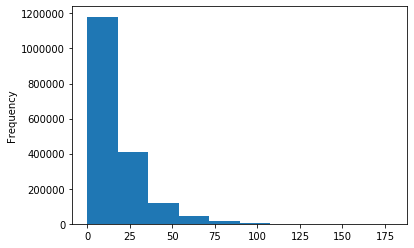

In [94]:
df['visionscore'].plot(kind="hist")

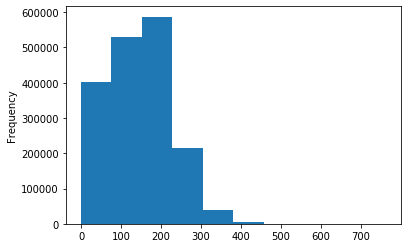

In [95]:
df['farm'].plot(kind="hist")

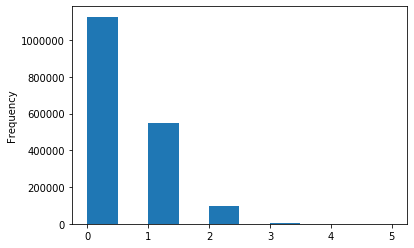

In [96]:
df['baronkills'].plot(kind="hist")

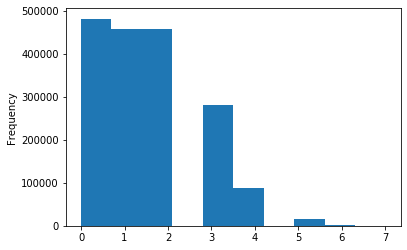

In [97]:
df['dragonkills'].plot(kind="hist")

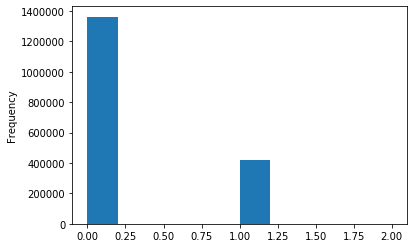

In [98]:
df['harrykills'].plot(kind="hist")

In [99]:
df = df[df['visionscore'] <= 100]
df = df[df['farm'] <= 400]
df = df[df['baronkills'] <= 3]
df = df[df['dragonkills'] <= 5]
df = df[df['harrykills'] <= 1]

In [100]:
df.describe()

,win,kills,deaths,assists,visionscore,goldearned,turretkills,inhibkills,firstblood,farm,baronkills,dragonkills,harrykills
count,1.770612e+06,1.770612e+06,1.770612e+06,1.770612e+06,1.770612e+06,1.770612e+06,1.770612e+06,1.770612e+06,1.770612e+06,1.770612e+06,1.770612e+06,1.770612e+06,1.770612e+06
mean,4.995103e-01,5.950672e+00,5.977339e+00,8.539131e+00,1.408031e+01,1.169779e+04,9.384286e-01,1.848660e-01,1.003856e-01,1.444841e+02,4.239144e-01,1.479538e+00,2.342992e-01
std,4.999999e-01,4.556915e+00,3.157973e+00,5.808418e+00,1.702835e+01,3.598000e+03,1.217530e+00,4.655621e-01,3.005136e-01,7.941046e+01,6.077109e-01,1.223784e+00,4.235601e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.064000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,9.105000e+03,0.000000e+00,0.000000e+00,0.000000e+00,8.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,1.000000e+01,1.147500e+04,1.000000e+00,0.000000e+00,0.000000e+00,1.480000e+02,0.000000e+00,1.000000e+00,0.000000e+00
75%,1.000000e+00,9.000000e+00,8.000000e+00,1.200000e+01,2.200000e+01,1.400400e+04,1.000000e+00,0.000000e+00,0.000000e+00,1.990000e+02,1.000000e+00,2.000000e+00,0.000000e+00
max,1.000000e+00,4.500000e+01,3.800000e+01,5.200000e+01,1.000000e+02,3.656300e+04,1.000000e+01,7.000000e+00,1.000000e+00,4.000000e+02,3.000000e+00,5.000000e+00,1.000000e+00


In [101]:
df
#1770612 linhas com 14 features

,win,kills,deaths,assists,visionscore,goldearned,turretkills,inhibkills,firstblood,farm,championname,baronkills,dragonkills,harrykills
0,0,6,10,1,14,10497,0,0,0,111,Warwick,0,0,0
1,0,0,2,12,30,9496,1,0,0,18,Nami,0,0,0
2,0,7,8,5,26,13136,0,0,0,208,Draven,0,0,0
3,0,5,11,2,5,11006,3,0,0,170,Fiora,0,0,0
4,0,2,8,2,15,11439,1,0,0,239,Viktor,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834512,0,11,10,2,0,16413,1,0,0,319,Jinx,0,1,0
1834513,0,11,9,7,0,13340,0,0,0,192,Annie,0,1,0
1834514,0,4,8,10,0,11972,1,0,0,59,Blitzcrank,0,1,0
1834515,0,2,11,3,0,10041,0,0,0,100,Riven,0,1,0


### 4) **(60%)** Nos blocos seguintes construa análises que vão justificar suas conclusões.

#### 4.1) **(20%)** Análise 1 -  Distribuição dos valores para cada uma das variáveis
- Exemplo para variável contínua: se o conjunto de dados possui a variável "idade". Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?

- Exemplo para variável discreta: se o conjunto de dados possui a variável "gênero", quantos % do conjunto de dados é do sexo feminino, quantos % é masculino? Inclua outros gêneros se houver.


In [102]:
#win
df['win'].value_counts(normalize=True)
#0 = perder
#1 = ganhar
#distribuição homogenia (o jogo é bem balanceado)

0    0.50049
1    0.49951
Name: win, dtype: float64

Text(0.5, 1.0, 'Quantidade de kills por faixa')

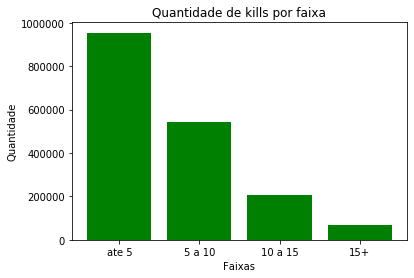

In [103]:
#kills
a = len(df[df['kills'] <= 5])
b = len(df[df['kills'] <=10])
c = len(df[df['kills'] <=15])
d = len(df['kills'])

x = ['ate 5','5 a 10','10 a 15','15+']
y = [a,b-a,c-b,d-c]
plt.bar(x, y, label = 'Barrar1', color = 'g')
plt.xlabel("Faixas")
plt.ylabel("Quantidade")
plt.title('Quantidade de kills por faixa')

Text(0.5, 1.0, 'Quantidade de deaths por faixa')

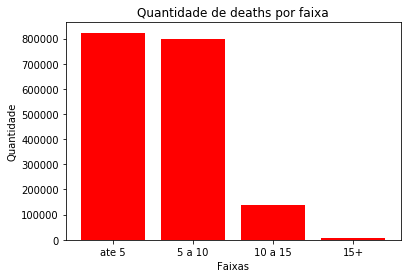

In [104]:
#deaths
a = len(df[df['deaths'] <= 5])
b = len(df[df['deaths'] <=10])
c = len(df[df['deaths'] <=15])
d = len(df['deaths'])

x = ['ate 5','5 a 10','10 a 15','15+']
y = [a,b-a,c-b,d-c]
plt.bar(x, y, label = 'Barrar1', color = 'r')
plt.xlabel("Faixas")
plt.ylabel("Quantidade")
plt.title('Quantidade de deaths por faixa')

Text(0.5, 1.0, 'Quantidade de assists por faixa')

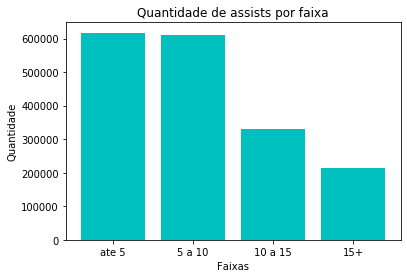

In [105]:
#assists
a = len(df[df['assists'] <= 5])
b = len(df[df['assists'] <=10])
c = len(df[df['assists'] <=15])
d = len(df['assists'])

x = ['ate 5','5 a 10','10 a 15','15+']
y = [a,b-a,c-b,d-c]
plt.bar(x, y, label = 'Barrar1', color = 'c')
plt.xlabel("Faixas")
plt.ylabel("Quantidade")
plt.title('Quantidade de assists por faixa')

Text(0.5, 1.0, 'Quantidade de visionscore por faixa')

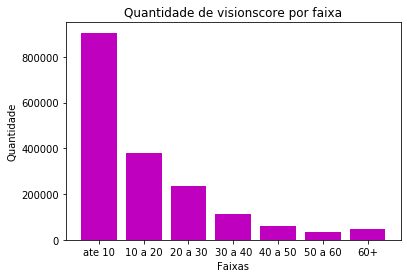

In [106]:
#visionscore
a = len(df[df['visionscore'] <= 10])
b = len(df[df['visionscore'] <=20])
c = len(df[df['visionscore'] <=30])
d = len(df[df['visionscore'] <=40])
e = len(df[df['visionscore'] <=50])
f = len(df[df['visionscore'] <=60])
g = len(df['visionscore'])


x = ['ate 10','10 a 20','20 a 30','30 a 40','40 a 50','50 a 60','60+']
y = [a,b-a,c-b,d-c,e-d,f-e,g-f]
plt.bar(x, y, label = 'Barrar1', color = 'm')
plt.xlabel("Faixas")
plt.ylabel("Quantidade")
plt.title('Quantidade de visionscore por faixa')

Text(0.5, 1.0, 'Quantidade de goldearned por faixa')

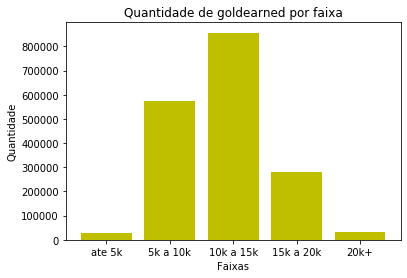

In [107]:
#assists
a = len(df[df['goldearned'] <= 5000])
b = len(df[df['goldearned'] <=10000])
c = len(df[df['goldearned'] <=15000])
d = len(df[df['goldearned'] <=20000])
e = len(df['goldearned'])

x = ['ate 5k','5k a 10k','10k a 15k','15k a 20k','20k+']
y = [a,b-a,c-b,d-c,e-d]
plt.bar(x, y, label = 'Barrar1', color = 'y')
plt.xlabel("Faixas")
plt.ylabel("Quantidade")
plt.title('Quantidade de goldearned por faixa')

In [108]:
#turretkills
df['turretkills'].value_counts(normalize=True)
#Devido a distribuição desigual dos valores, percebe-se que algum campeão do time, geralmente, tem uma maior tendência a focar em destruir as torres

0     0.493784
1     0.256230
2     0.135730
3     0.068278
4     0.030078
5     0.011268
6     0.003467
7     0.000921
8     0.000203
9     0.000036
10    0.000006
Name: turretkills, dtype: float64

In [109]:
#inhibkills
df['inhibkills'].value_counts(normalize=True)
#Devido a distribuição desigual dos valores, percebe-se que algum campeão do time, geralmente, tem uma maior tendência a focar em destruir os inibidores

0    0.843965
1    0.130865
2    0.021969
3    0.002811
4    0.000331
5    0.000052
6    0.000006
7    0.000002
Name: inhibkills, dtype: float64

In [110]:
#firstblood
df['firstblood'].value_counts(normalize=True)
#Distribuição naturalmente desigual, já que apenas um jogador por partida consegue este marco (primeiro abate)

0    0.899614
1    0.100386
Name: firstblood, dtype: float64

Text(0.5, 1.0, 'Quantidade de farm por faixa')

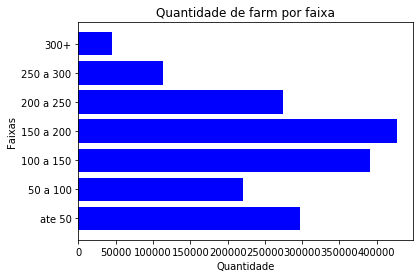

In [111]:
#farm
a = len(df[df['farm'] <= 50])
b = len(df[df['farm'] <=100])
c = len(df[df['farm'] <=150])
d = len(df[df['farm'] <=200])
e = len(df[df['farm'] <=250])
f = len(df[df['farm'] <=300])
g = len(df['farm'])

x = ['ate 50','50 a 100','100 a 150','150 a 200','200 a 250','250 a 300','300+']
y = [a,b-a,c-b,d-c,e-d,f-e,g-f]
plt.barh(x, y, label = 'Barrar1', color = 'b')
plt.ylabel("Faixas")
plt.xlabel("Quantidade")
plt.title('Quantidade de farm por faixa')

In [112]:
#baronkills
df['baronkills'].value_counts(normalize=True)
#Raros os caso de o jogo se estender o suficiente para que dois barões sejam executados, ainda assim a maioria não chega a fazer o barão

0    0.635148
1    0.309279
2    0.052085
3    0.003489
Name: baronkills, dtype: float64

In [113]:
#dragonkills
df['dragonkills'].value_counts(normalize=True)
#Objetivo bem aproveitado pelos jogadores

0    0.271355
2    0.257427
1    0.257089
3    0.157059
4    0.048934
5    0.008136
Name: dragonkills, dtype: float64

In [114]:
#harrykills
df['harrykills'].value_counts(normalize=True)
#Objetivo mal aproveitado pelos jogadores, 3/4 dos jogos é ignorado

0    0.765701
1    0.234299
Name: harrykills, dtype: float64

#### 4.2) **(20%)** Análise 2 - Dependência entre variáveis
O aluno deve apresentar as mesmas distribuições para cada valor da variável dependente. Exemplo: Em um conjunto de dados em que as variáveis independentes são idade e sexo, e a variável dependente é renda. O aluno pode dividir a renda em 3 "grupos", <1000 reais, entre 1000 e 10000 reais e >1000 reais. Para cada um desses grupos, é necessário apresentar a distribuição das variáveis "idade" e "sexo".


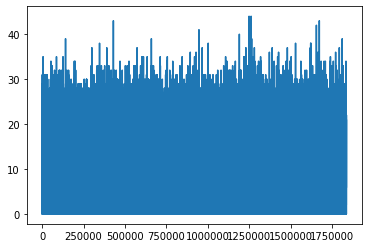

In [115]:
df_kills_win = df[df['win'] == 1]
plt.plot(df_kills_win['kills'])

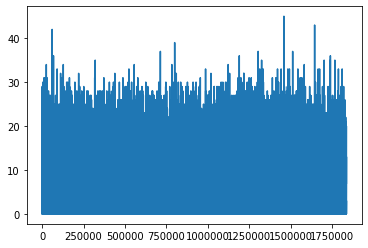

In [116]:
df_kills_lose = df[df['win'] == 0]
plt.plot(df_kills_lose['kills'])

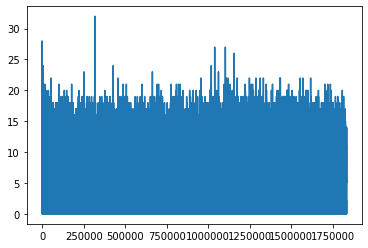

In [117]:
df_deaths_win = df[df['win'] == 1]
plt.plot(df_deaths_win['deaths'])

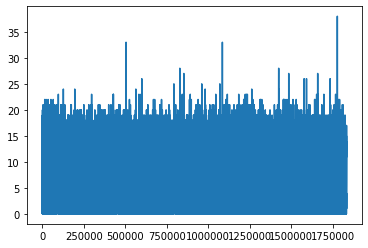

In [118]:
df_deaths_lose = df[df['win'] == 0]
plt.plot(df_deaths_lose['deaths'])

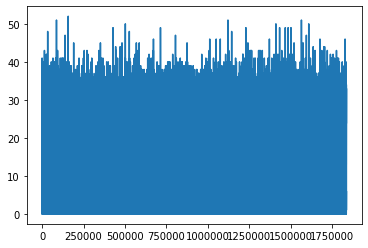

In [119]:
df_assists_win = df[df['win'] == 1]
plt.plot(df_assists_win['assists'])

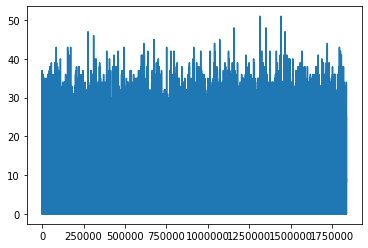

In [120]:
df_assists_lose = df[df['win'] == 0]
plt.plot(df_assists_lose['assists'])

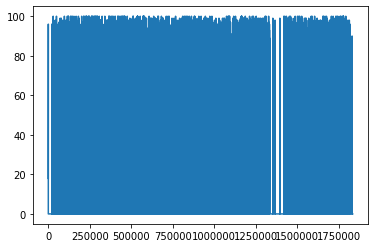

In [121]:
df_visionscore_win = df[df['win'] == 1]
plt.plot(df_visionscore_win['visionscore'])

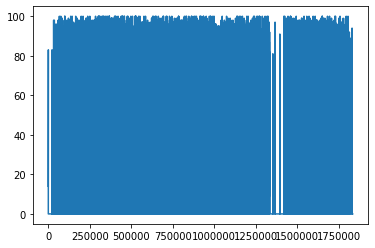

In [122]:
df_visionscore_lose = df[df['win'] == 0]
plt.plot(df_visionscore_lose['visionscore'])

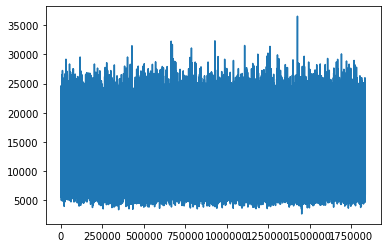

In [123]:
df_goldearned_win = df[df['win'] == 1]
plt.plot(df_goldearned_win['goldearned'])

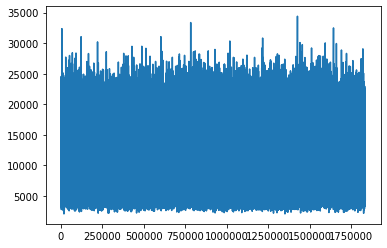

In [124]:
df_goldearned_lose = df[df['win'] == 0]
plt.plot(df_goldearned_lose['goldearned'])

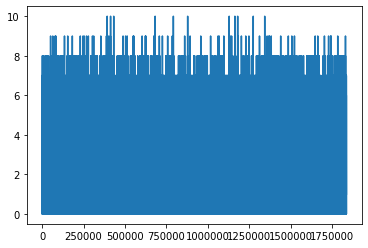

In [125]:
df_turretkills_win = df[df['win'] == 1]
plt.plot(df_turretkills_win['turretkills'])

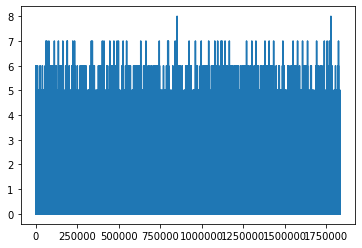

In [126]:
df_turretkills_lose = df[df['win'] == 0]
plt.plot(df_turretkills_lose['turretkills'])

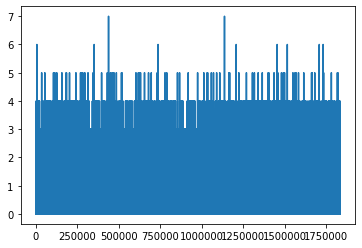

In [127]:
df_inhibkills_win = df[df['win'] == 1]
plt.plot(df_inhibkills_win['inhibkills'])

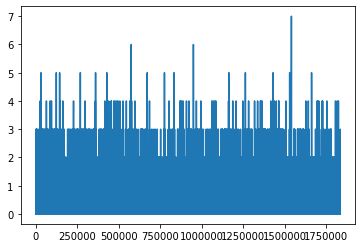

In [128]:
df_inhibkills_lose = df[df['win'] == 0]
plt.plot(df_inhibkills_lose['inhibkills'])

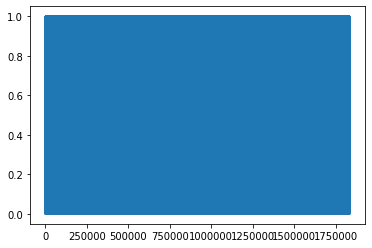

In [129]:
df_firstblood_win = df[df['win'] == 1]
plt.plot(df_firstblood_win['firstblood'])

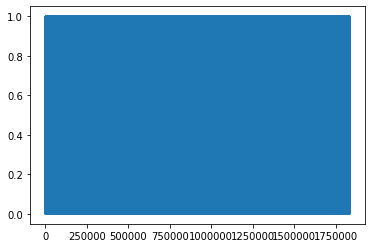

In [130]:
df_firstblood_lose = df[df['win'] == 0]
plt.plot(df_firstblood_lose['firstblood'])

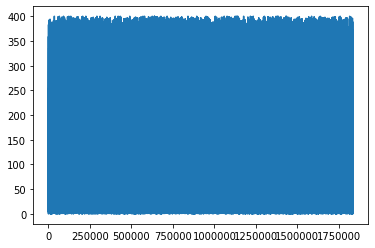

In [131]:
df_farm_win = df[df['win'] == 1]
plt.plot(df_farm_win['farm'])

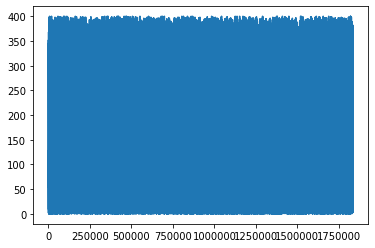

In [132]:
df_farm_lose = df[df['win'] == 0]
plt.plot(df_farm_lose['farm'])

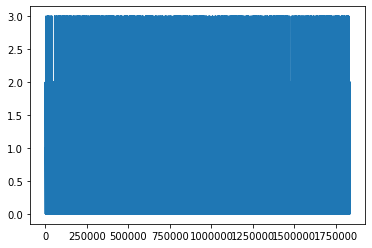

In [133]:
df_baronkills_win = df[df['win'] == 1]
plt.plot(df_baronkills_win['baronkills'])

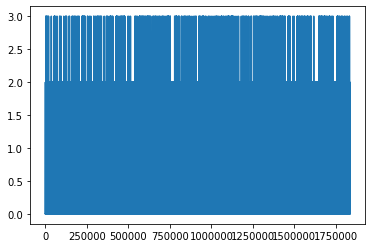

In [134]:
df_baronkills_lose = df[df['win'] == 0]
plt.plot(df_baronkills_lose['baronkills'])

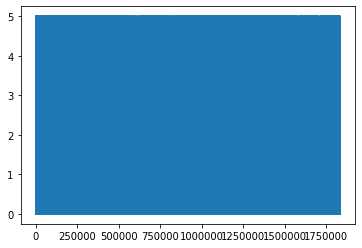

In [135]:
df_dragonkills_win = df[df['win'] == 1]
plt.plot(df_dragonkills_win['dragonkills'])

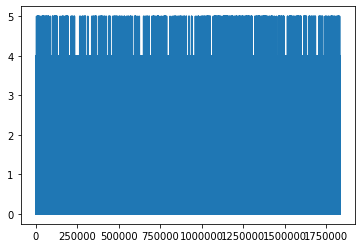

In [136]:
df_dragonkills_lose = df[df['win'] == 0]
plt.plot(df_dragonkills_lose['dragonkills'])

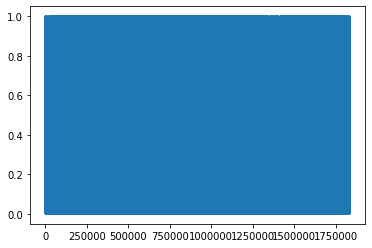

In [137]:
df_harrykills_win = df[df['win'] == 1]
plt.plot(df_harrykills_win['harrykills'])

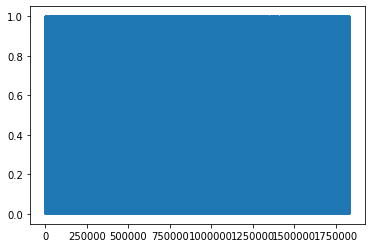

In [138]:
df_harrykills_lose = df[df['win'] == 0]
plt.plot(df_harrykills_lose['harrykills'])

#### 4.3) **(20%)** Análise 3 - Correlação entre variáveis

O aluno deve apresentar 3 análises de correlação entre variáveis do conjunto de dados trabalhado. Exemplo: Em um conjunto de dados com as informações de temperatura e ocorrência de incêndios, eu gostaria de saber a incidência de correlação entre as duas variáveis.



In [139]:
df.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,win,kills,deaths,assists,visionscore,goldearned,turretkills,inhibkills,firstblood,farm,baronkills,dragonkills,harrykills
win,1.0,0.27,-0.39,0.32,0.053,0.31,0.42,0.33,0.063,0.065,0.42,0.52,0.23
kills,0.27,1.0,0.12,0.037,-0.039,0.73,0.41,0.26,0.2,0.51,0.25,0.29,0.056
deaths,-0.39,0.12,1.0,0.088,0.03,0.27,-0.13,-0.085,-0.0052,0.13,0.043,-0.062,-0.13
assists,0.32,0.037,0.088,1.0,0.28,0.39,0.031,0.081,-0.038,-0.17,0.36,0.35,0.037
visionscore,0.053,-0.039,0.03,0.28,1.0,0.13,-0.035,0.0053,-0.012,-0.13,0.16,0.13,0.13
goldearned,0.31,0.73,0.27,0.39,0.13,1.0,0.44,0.31,0.11,0.68,0.51,0.49,0.054
turretkills,0.42,0.41,-0.13,0.031,-0.035,0.44,1.0,0.37,0.091,0.41,0.24,0.31,0.14
inhibkills,0.33,0.26,-0.085,0.081,0.0053,0.31,0.37,1.0,0.046,0.21,0.23,0.25,0.094
firstblood,0.063,0.2,-0.0052,-0.038,-0.012,0.11,0.091,0.046,1.0,0.072,0.019,0.048,0.036
farm,0.065,0.51,0.13,-0.17,-0.13,0.68,0.41,0.21,0.072,1.0,0.21,0.2,-3.3e-05


In [140]:
'''Correlação 1: A correlação mais forte demonstrada acima é a de goldearned e kills, com um valor de 0,73, ou seja, quanto maior o seu foco em obter kills, maior a probabilidade que você termine o jogo com uma alta quantidade de ouro.'''

'Correlação 1: A correlação mais forte demonstrada acima é a de goldearned e kills, com um valor de 0,73, ou seja, quanto maior o seu foco em obter kills, maior a probabilidade que você termine o jogo com uma alta quantidade de ouro.'

In [141]:
'''Correlação 2: A segunda correlação mais forte no gráfico é a de farm e goldearned, com um valor de 0,68, quase tão alto quanto a correlação anterior e devendo ser tratada com a mesma importância.'''

'Correlação 2: A segunda correlação mais forte no gráfico é a de farm e goldearned, com um valor de 0,68, quase tão alto quanto a correlação anterior e devendo ser tratada com a mesma importância.'

In [142]:
'''Correlação 3: Curiosamente a terceira correlação mais forte no gráfico é a de win e dragonkills, um objetivo já bem focado pelos jogadores como demonstrado acima, com um valor de 0,52, e quanto paramos para a analisar as correlações de win, objetivo principal do jogo, notamos que suas correlações mais fortes são com dragonkills(0,52), baronkills(0,42) e turretkills(0,42).'''

'Correlação 3: Curiosamente a terceira correlação mais forte no gráfico é a de win e dragonkills, um objetivo já bem focado pelos jogadores como demonstrado acima, com um valor de 0,52, e quanto paramos para a analisar as correlações de win, objetivo principal do jogo, notamos que suas correlações mais fortes são com dragonkills(0,52), baronkills(0,42) e turretkills(0,42).'

### 5) Conclusões **15%**

*O que é possível concluir com os dados que você analisou? Se fosse fazer uma apresentação, o que levaria como os maiores destaques e por que?*

Como podemos analisar com os dados demonstrados, apesar de obter abates e farmes, que como consequência lhe provem ouro e lhe deixa mais forte que os demais jogadores, kills(0,27), goldearned(0,31) e farm(0,06) possuem correlações muito baixas para com o campo win, que é o mais importante de ser alcançado, podemos notar ainda que o deaths(-0,39) tem uma correlação negativa com win que é mais forte que os três campos citados acima, por tanto em uma ordem de prioridade, é preferível não morrer a matar e farmar. Se colocarmos nosso foco nas correlações existentes em win, vamos notar que os campos mais relecantes são: dragonkills(0,52), baronkills(0,42) e turretkills(0,42), coisas que deveriam ser o foco dos jogadores durante o jogo, o dragão já é bem focado pelos jogadores, mas há espaço para melhorias, já quanto as torres, vimos que elas são mal focadas pelos jogadores, tendo quase 50% deles não destruindo nem uma torre durante toda a partida, este objetivo poderia ganhar uma maior atenção dos jogadores devido a sua relevância em win. Quando abordamos o campo baron a coisa fica ainda pior, pois em 63% dos jogos nenhum dos dois times mata o barão o que é um grande desperdício, dado sua relevância e influencia em win.
Pro tanto podemos concluir que os três principais focos dos jogadores deveriam sem o dragão, o barão e as torres, e se possível não morrer muito colabora muito.